<a href="https://colab.research.google.com/github/HongTuoiNguyen02/BTVN_Nguyen-Hong-Tuoi_20104071/blob/main/Nhan_dang_do_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from sklearn.utils import validation
from keras.preprocessing.image import ImageDataGenerator
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Food/

/content/drive/MyDrive/Colab Notebooks/BTVN/Food


In [ ]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Train',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 155 images belonging to 6 classes.


In [ ]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Test',target_size=(300,300), batch_size=32, class_mode='categorical')

Found 48 images belonging to 6 classes.


In [ ]:
train_set.class_indices

{'Banh mi': 0,
 'Banh tet': 1,
 'Banh xeo': 2,
 'Ca kho': 3,
 'Chao': 4,
 'Hu tieu': 5}

In [ ]:
test_set.class_indices

{'Banh mi': 0,
 'Banh tet': 1,
 'Banh xeo': 2,
 'Ca kho': 3,
 'Chao': 4,
 'Hu tieu': 5}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(300,300,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/100
2/5 [===========>..................] - ETA: 17s - loss: 69.0114 - accuracy: 0.0938

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


5/5 [==============================] - 89s 15s/step - loss: 38.6313 - accuracy: 0.1290 - val_loss: 1.9961 - val_accuracy: 0.1667
Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: 1.9652 - accuracy: 0.1419 - val_loss: 1.7553 - val_accuracy: 0.2083
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 1.7377 - accuracy: 0.2581 - val_loss: 1.5937 - val_accuracy: 0.2917
Epoch 4/100
5/5 [==============================] - 7s 1s/step - loss: 1.7200 - accuracy: 0.2387 - val_loss: 1.6805 - val_accuracy: 0.3333
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 1.7055 - accuracy: 0.2258 - val_loss: 1.6659 - val_accuracy: 0.2708
Epoch 6/100
5/5 [==============================] - 7s 1s/step - loss: 1.6285 - accuracy: 0.3097 - val_loss: 1.6065 - val_accuracy: 0.2708
Epoch 7/100
5/5 [==============================] - 7s 1s/step - loss: 1.5612 - accuracy: 0.3742 - val_loss: 1.4153 - val_accuracy: 0.5833
Epoch 8/100
5/5 [==========================

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Nhan_dang_do_an.h5')

In [ ]:
model_doan = load_model('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Nhan_dang_do_an.h5')

In [ ]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.007257299497723579
Train Accuracy 1.0


1/1 [==============================] - 1s 774ms/step
Ca kho


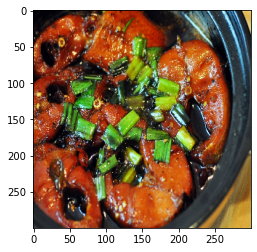

1/1 [==============================] - 0s 18ms/step
Ca kho


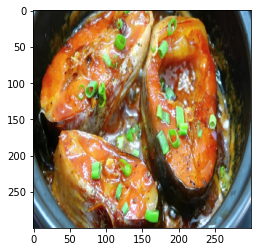

1/1 [==============================] - 0s 16ms/step
Ca kho


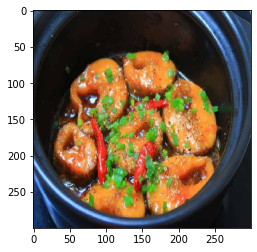

1/1 [==============================] - 0s 33ms/step
Banh mi


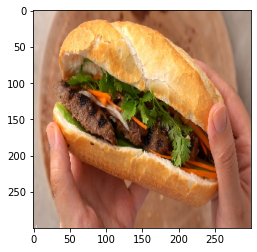

1/1 [==============================] - 0s 17ms/step
Banh mi


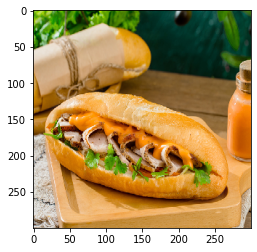

1/1 [==============================] - 0s 17ms/step
Banh mi


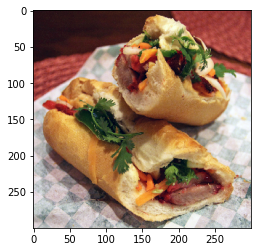

1/1 [==============================] - 0s 19ms/step
Banh tet


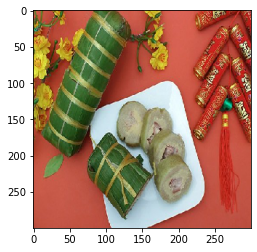

1/1 [==============================] - 0s 19ms/step
Banh tet


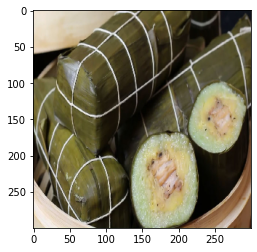

1/1 [==============================] - 0s 19ms/step
Banh tet


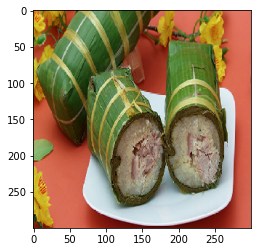

1/1 [==============================] - 0s 19ms/step
Banh xeo


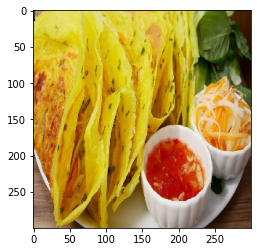

1/1 [==============================] - 0s 22ms/step
Banh xeo


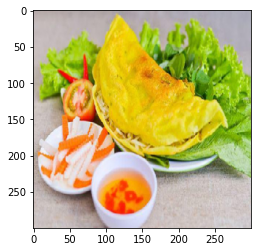

1/1 [==============================] - 0s 17ms/step
Banh xeo


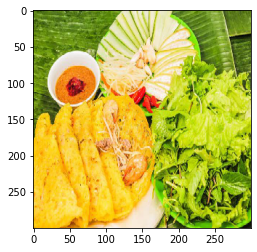

1/1 [==============================] - 0s 19ms/step
Chao


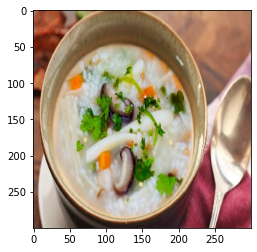

1/1 [==============================] - 0s 17ms/step
Chao


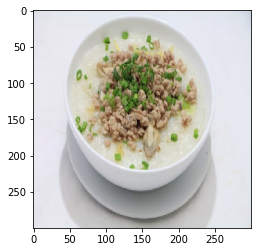

1/1 [==============================] - 0s 18ms/step
Chao


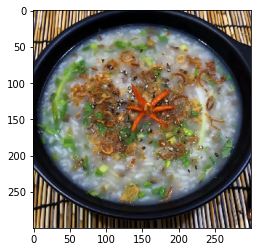

1/1 [==============================] - 0s 19ms/step
Hu tieu


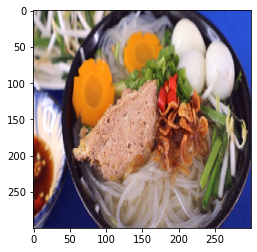

1/1 [==============================] - 0s 16ms/step
Hu tieu


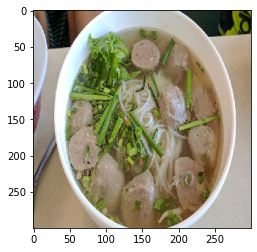

1/1 [==============================] - 0s 19ms/step
Hu tieu


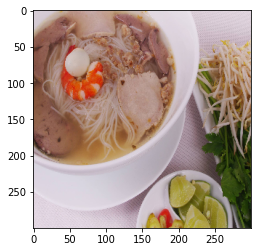

In [ ]:
test='/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Validation'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_doan.predict(img)
  if round(result[0][0])==1:
    prediction='Banh mi'
  if round(result[0][1])==1:
    prediction = 'Banh tet'
  if round(result[0][2])==1:
    prediction='Banh xeo'
  if round(result[0][3])==1:
    prediction='Ca kho'
  if round(result[0][4])==1:
    prediction='Chao'
  if round(result[0][5])==1:
    prediction='Hu tieu'
  print(prediction)
  plt.show()

In [ ]:
#xuất pdf
!jupyter nbconvert --to html "/content/Nhan_dang_do_ann.ipynb"  

[NbConvertApp] Converting notebook /content/Nhan_dang_do_ann.ipynb to html
[NbConvertApp] Writing 2849013 bytes to /content/Nhan_dang_do_ann.html
